# 감성데이터 딥러닝 회귀모델 개발
- 감성어의 이동평균선과 이동평균선의 변화율을 통해 주가지수의 변화율을 추종할 수 있는지 파악한다.

# 필요한 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 그래프 출력시 경고문구 삭제
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 그래프 한글 출력
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus']= False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

# csv 파일 불러와서 전처리

In [506]:
df = pd.read_csv('감성어이동평균변화율_전처리.csv',index_col = 'Date')
df = df.dropna()
df

Close       Open       High        Low           Volume  \
Date                                                                      
2017-06-29 2395.66000 2396.81000 2402.80000 2393.57000  445130000.00000   
2017-06-30 2391.79000 2382.15000 2391.81000 2381.40000  343530000.00000   
2017-07-03 2394.48000 2397.66000 2399.90000 2384.55000  310990000.00000   
2017-07-04 2380.52000 2395.24000 2398.02000 2376.41000  411780000.00000   
2017-07-05 2388.35000 2377.01000 2390.29000 2375.63000  333720000.00000   
...               ...        ...        ...        ...              ...   
2020-12-22 2733.68000 2772.03000 2774.22000 2733.64000 1260000000.00000   
2020-12-23 2759.82000 2737.74000 2769.08000 2716.28000 1120000000.00000   
2020-12-24 2806.86000 2762.60000 2812.16000 2762.60000 1030000000.00000   
2020-12-28 2808.60000 2820.95000 2834.59000 2799.56000 1010000000.00000   
2020-12-29 2820.51000 2810.55000 2823.44000 2792.06000 1050000000.00000   

             Change     감성어점수  감성어_Change  감성어5일_mvg  감성어5일_Change  ...  \
Date                                                                ...   
2017-06-29  0.00550 350.00000     0.65094  243.60000      -0.03333  ...   
2017-06-30 -0.00160 274.00000    -0.21714  259.40000       0.06486  ...   
2017-07-03  0.00110 377.00000     0.37591  233.20000      -0.10100  ...   
2017-07-04 -0.00580 319.00000    -0.15385  242.60000       0.04031  ...   
2017-07-05  0.00330 193.00000    -0.39498  264.00000       0.08821  ...   
...             ...       ...         ...        ...           ...  ...   
2020-12-22 -0.01620 234.00000    -0.30564  258.60000       0.02782  ...   
2020-12-23  0.00960 308.00000     0.31624  229.00000      -0.11446  ...   
2020-12-24  0.01700 360.00000     0.16883  230.20000       0.00524  ...   
2020-12-28  0.00060 531.00000     0.47500  247.80000       0.07646  ...   
2020-12-29  0.00420 316.00000    -0.40490  286.60000       0.15658  ...   

            감성어60일이동평균  감성어60일_Change  감성어90일이동평균  감성어90일_Change  감성어120일이동평균  \
Date                                                                            
2017-06-29   377.80000       -0.00527   352.57778       -0.00545    355.90000   
2017-06-30   377.23333       -0.00150   352.25556       -0.00091    355.71667   
2017-07-03   373.73333       -0.00928   352.92222        0.00189    354.45833   
2017-07-04   374.15000        0.00111   352.91111       -0.00003    354.73333   
2017-07-05   374.23333        0.00022   351.73333       -0.00334    354.52500   
...                ...            ...         ...            ...          ...   
2020-12-22   294.93333        0.01137   268.07778        0.00112    294.53333   
2020-12-23   296.06667        0.00384   268.58889        0.00191    291.38333   
2020-12-24   298.13333        0.00698   269.04444        0.00170    289.45000   
2020-12-28   298.18333        0.00017   271.56667        0.00937    286.83333   
2020-12-29   300.70000        0.00844   275.18889        0.01334    285.63333   

            감성어120일_Change  KOSPI5일_mvg  KOSPI5일_Change  KOSPI10일_mvg  \
Date                                                                    
2017-06-29        -0.00077   1908.35400         0.00128    2137.16300   
2017-06-30        -0.00052   1911.76600         0.00179    2140.54600   
2017-07-03        -0.00354   1912.39200         0.00033    2142.63500   
2017-07-04         0.00078   1912.89800         0.00026    2145.16000   
2017-07-05        -0.00059   1912.49000        -0.00021    2147.45900   
...                    ...          ...             ...           ...   
2020-12-22        -0.00319   2218.61000         0.00197    2488.40600   
2020-12-23        -0.01069   2210.98800        -0.00344    2486.22700   
2020-12-24        -0.00664   2208.86600        -0.00096    2487.56300   
2020-12-28        -0.00904   2215.80200         0.00314    2491.24300   
2020-12-29        -0.00418   2221.79200         0.00270    2495.88300   

            KOSPI10일_Change  
Date                         


In [511]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit(df)

In [515]:
scaled_total_df = scaler.transform(df)

In [516]:
scaled_total_df = pd.DataFrame(scaled_total_df)

In [517]:
scaled_total_df.index = df.index
scaled_total_df.columns = df.columns
scaled_total_df.head(10)

Close    Open    High     Low   Volume   Change    감성어점수  \
Date                                                                    
2017-06-29 0.71141 0.71223 0.69288 0.75932 -0.36170  0.44607 -0.23199   
2017-06-30 0.69282 0.64180 0.63959 0.70127 -0.72113 -0.15917 -0.58887   
2017-07-03 0.70574 0.71631 0.67881 0.71630 -0.83625  0.07099 -0.10520   
2017-07-04 0.63868 0.70468 0.66970 0.67747 -0.47968 -0.51720 -0.37756   
2017-07-05 0.67629 0.61711 0.63221 0.67375 -0.75584  0.25853 -0.96923   
2017-07-06 0.67370 0.68100 0.64293 0.69851 -0.86993 -0.03983 -0.41982   
2017-07-07 0.63556 0.61366 0.60666 0.66040 -0.82429 -0.30409 -1.23689   
2017-07-10 0.64627 0.66174 0.63018 0.68525 -0.88836  0.05394 -0.60296   
2017-07-11 0.71304 0.66232 0.66213 0.70743 -0.93010  0.47164 -0.28834   
2017-07-12 0.69272 0.70550 0.67581 0.74444 -0.98504 -0.17622 -0.57009   

            감성어_Change  감성어5일_mvg  감성어5일_Change  ...  감성어60일이동평균  \
Date                                             ...               
2017-06-29     0.21508   -0.58114      -0.08384  ...    -0.18239   
2017-06-30    -0.10641   -0.45984       0.08815  ...    -0.18870   
2017-07-03     0.11322   -0.66098      -0.20236  ...    -0.22767   
2017-07-04    -0.08297   -0.58881       0.04514  ...    -0.22303   
2017-07-05    -0.17227   -0.42453       0.12904  ...    -0.22211   
2017-07-06     0.19851   -0.66558      -0.23377  ...    -0.23213   
2017-07-07    -0.23386   -0.61031       0.02876  ...    -0.22786   
2017-07-10     0.34162   -0.98034      -0.37750  ...    -0.24735   
2017-07-11     0.06557   -1.05404      -0.11321  ...    -0.23473   
2017-07-12    -0.09173   -0.83141       0.25362  ...    -0.22582   

            감성어60일_Change  감성어90일이동평균  감성어90일_Change  감성어120일이동평균  \
Date                                                                
2017-06-29       -0.40118    -0.59492       -0.62300     -0.69562   
2017-06-30       -0.10344    -0.59913       -0.07848     -0.69844   
2017-07-03       -0.71838    -0.59042        0.25816     -0.71782   
2017-07-04        0.10328    -0.59056        0.02737     -0.71358   
2017-07-05        0.03275    -0.60596       -0.36916     -0.71679   
2017-07-06       -0.17499    -0.63893       -0.82899     -0.73835   
2017-07-07        0.09632    -0.64764       -0.19784     -0.73283   
2017-07-10       -0.35507    -0.66652       -0.46595     -0.75670   
2017-07-11        0.25603    -0.65766        0.26537     -0.76658   
2017-07-12        0.18466    -0.64779        0.29174     -0.75144   

            감성어120일_Change  KOSPI5일_mvg  KOSPI5일_Change  KOSPI10일_mvg  \
Date                                                                    
2017-06-29        -0.08711      0.67792         0.17012       0.64144   
2017-06-30        -0.04522      0.69871         0.25022       0.66007   
2017-07-03        -0.53794      0.70252         0.02029       0.67157   
2017-07-04         0.16524      0.70560         0.01039       0.68547   
2017-07-05        -0.05698      0.70312        -0.06484       0.69813   
2017-07-06        -0.60502      0.69421        -0.15162       0.70803   
2017-07-07         0.20419      0.68936        -0.09684       0.71310   
2017-07-10        -0.67610      0.67156        -0.27209       0.70826   
2017-07-11        -0.25848      0.67349        -0.00518       0.70284   
2017-07-12         0.49510      0.68281         0.09501       0.71024   

            KOSPI10일_Change  
Date                         
2017-06-29          0.31715  
2017-06-30          0.17864  
2017-07-03          0.22485  
2017-07-04          0.20050  
2017-07-05          0.14700  
2017-07-06          0.05373  
2017-07-07         -0.13734  
2017-07-10         -0.14863  
2017-07-11          0.09870  
2017-07-12         -0.08534  

[10 rows x 26 columns]

In [46]:
df_1 = scaled_total_df[['Close','감성어10일이동평균','감성어20일이동평균','감성어30일이동평균','감성어60일이동평균','감성어120일이동평균']]

<AxesSubplot:xlabel='Date'>

<Figure size 1080x1080 with 0 Axes>

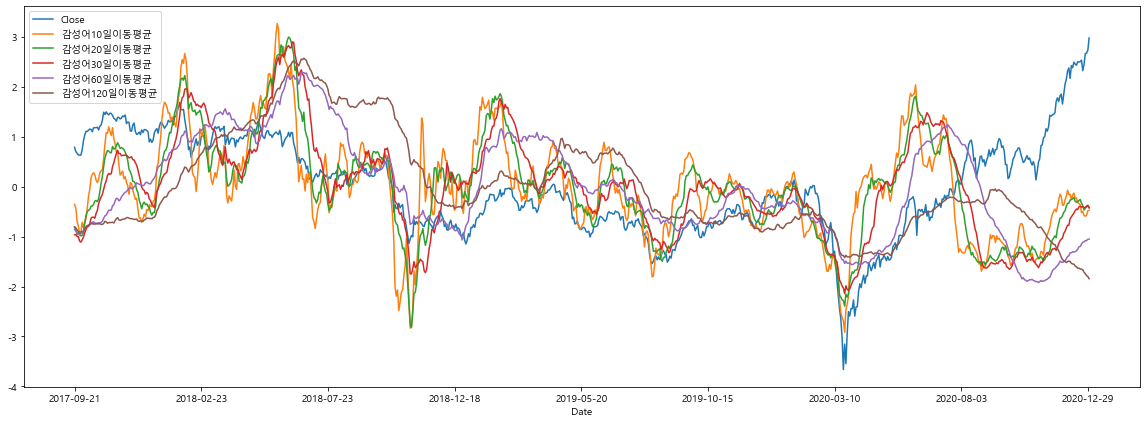

In [47]:
plt.figure(figsize = (15,15))
df_1 = df_1.sort_index(ascending = True)
df_1.plot(figsize = (20,7))

In [219]:
df_1 = scaled_total_df[['KOSPI5일_mvg', '감성어10일이동평균','감성어20일이동평균','감성어30일이동평균','감성어60일이동평균','감성어120일이동평균']]

<AxesSubplot:xlabel='Date'>

<Figure size 1080x1080 with 0 Axes>

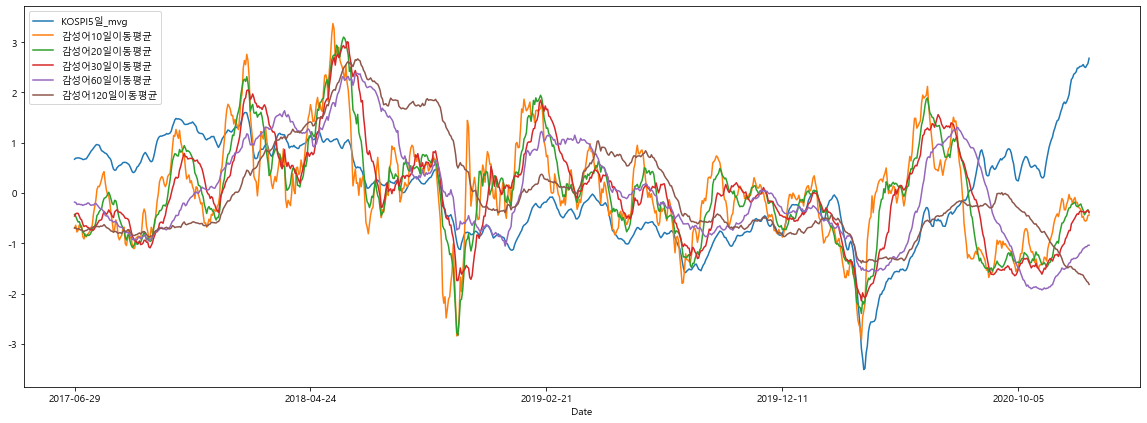

In [220]:
plt.figure(figsize = (15,15))
df_1 = df_1.sort_index(ascending = True)
df_1.plot(figsize = (20,7))

# 상관관계 시각화

<AxesSubplot:>

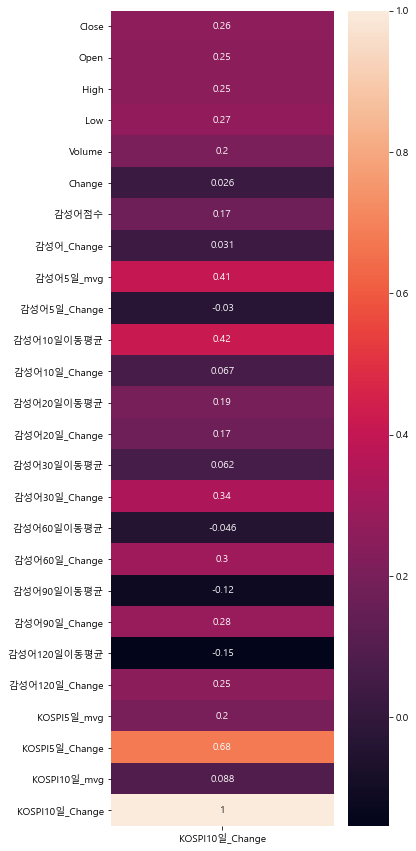

In [196]:
plt.figure(figsize = (5,15))
sns.heatmap(scaled_total_df.corr()[['KOSPI10일_Change']], annot=True)

# y값 설정

In [493]:
Y_values=scaled_total_df['KOSPI10일_Change'].tolist()

# 기술ver.

In [560]:
# Only 기술
X_values=scaled_total_df[['Close','Open','High','Low','Volume','KOSPI5일_mvg']]
X_values[:10]

Close    Open    High     Low   Volume  KOSPI5일_mvg
Date                                                            
2017-06-29 0.71141 0.71223 0.69288 0.75932 -0.36170      0.67792
2017-06-30 0.69282 0.64180 0.63959 0.70127 -0.72113      0.69871
2017-07-03 0.70574 0.71631 0.67881 0.71630 -0.83625      0.70252
2017-07-04 0.63868 0.70468 0.66970 0.67747 -0.47968      0.70560
2017-07-05 0.67629 0.61711 0.63221 0.67375 -0.75584      0.70312
2017-07-06 0.67370 0.68100 0.64293 0.69851 -0.86993      0.69421
2017-07-07 0.63556 0.61366 0.60666 0.66040 -0.82429      0.68936
2017-07-10 0.64627 0.66174 0.63018 0.68525 -0.88836      0.67156
2017-07-11 0.71304 0.66232 0.66213 0.70743 -0.93010      0.67349
2017-07-12 0.69272 0.70550 0.67581 0.74444 -0.98504      0.68281

In [561]:
window_size=10
x_values_sets = []
y_values_sets = []

for i in range(len(X_values)-window_size):
    x_values_sets.append(X_values.iloc[i:i+10, :].values.tolist())
    try:
        y_values_sets.append(Y_values[i+10])
    except:
        pass

X=np.asarray(x_values_sets)
Y=np.asarray(y_values_sets)

train_test_split=600

X_train = X[:train_test_split, :]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:, :]
Y_test = Y[train_test_split:]

Epoch 1/100
15/15 [==============================] - 1s 5ms/step - loss: 0.4451
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3761
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2778
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1987
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1720
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1410
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1218
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1361
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1081
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1017
Epoch 11/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0960
Epoch 12/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0879
Epoch 13/100
15/15 [=================

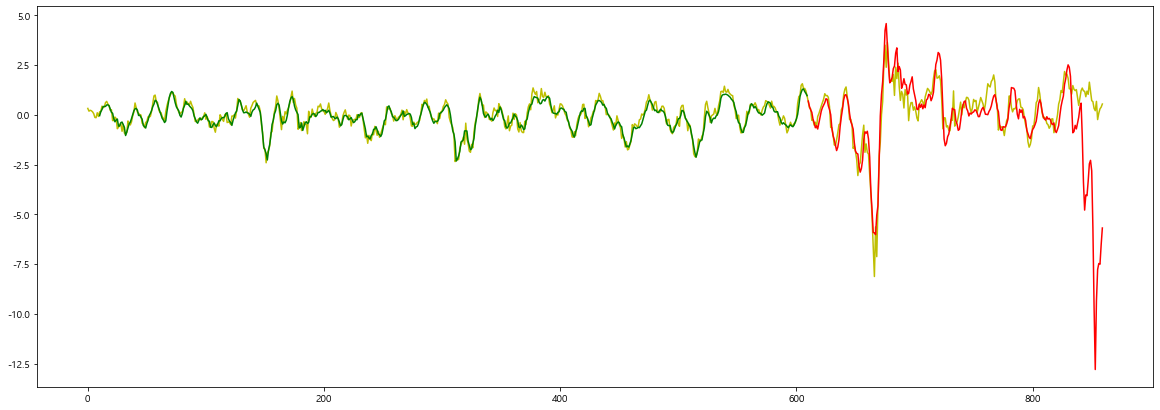

In [562]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.models import Sequential
import tensorflow as tf
activation = tf.nn.leaky_relu

model = Sequential()
model.add(LSTM(128, input_shape=(10,6),activation=activation))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.fit(X_train,Y_train, epochs=100, batch_size=40)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

plt.figure(figsize=(20,7))
plt.plot(Y_values, color='y')

split_pt = train_test_split + window_size
plt.plot(np.arange(window_size, split_pt, 1), train_predict, color='g' )

plt.plot(np.arange(split_pt, split_pt+len(test_predict),1), test_predict, color ='r')

In [563]:
# 예측 성능 조회
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import numpy as np
def confirm_result(y_test, y_pred):
    MAE= mean_absolute_error(y_test, y_pred)
    RMSE= np.sqrt(mean_squared_error(y_test, y_pred))
    R2= r2_score(y_test, y_pred)

    pd.options.display.float_format='{:.5f}'.format 
    Result=pd.DataFrame(data=[MAE, RMSE, R2], index=['MAE', 'RMSE', 'R2'], columns=['Results'])
    return Result

confirm_result(Y_test, test_predict)

Results
MAE   0.96740
RMSE  1.96708
R2   -0.69865

# 감성ver.

In [552]:
# Only 감성
X_values=scaled_total_df[['감성어점수','감성어5일_mvg','감성어10일이동평균','감성어20일_Change',
                          '감성어30일_Change','감성어60일_Change','감성어120일_Change']]
X_values[:10]

감성어점수  감성어5일_mvg  감성어10일이동평균  감성어20일_Change  감성어30일_Change  \
Date                                                                       
2017-06-29 -0.23199   -0.58114    -0.69840       -0.20092       -0.74962   
2017-06-30 -0.58887   -0.45984    -0.63965       -0.25742        0.51745   
2017-07-03 -0.10520   -0.66098    -0.77463       -0.40585        0.11133   
2017-07-04 -0.37756   -0.58881    -0.74287       -0.36034       -0.03580   
2017-07-05 -0.96923   -0.42453    -0.63488        0.00778       -0.61938   
2017-07-06 -0.41982   -0.66558    -0.68332       -0.46244       -0.73510   
2017-07-07 -1.23689   -0.61031    -0.65235       -0.42014       -0.25569   
2017-07-10 -0.60296   -0.98034    -0.86593       -0.57368       -1.01607   
2017-07-11 -0.28834   -1.05404    -0.91278       -0.20397       -0.64840   
2017-07-12 -0.57009   -0.83141    -0.81274       -0.41671        0.14990   

            감성어60일_Change  감성어120일_Change  
Date                                       
2017-06-29       -0.40118        -0.08711  
2017-06-30       -0.10344        -0.04522  
2017-07-03       -0.71838        -0.53794  
2017-07-04        0.10328         0.16524  
2017-07-05        0.03275        -0.05698  
2017-07-06       -0.17499        -0.60502  
2017-07-07        0.09632         0.20419  
2017-07-10       -0.35507        -0.67610  
2017-07-11        0.25603        -0.25848  
2017-07-12        0.18466         0.49510

In [553]:
window_size=10
x_values_sets = []
y_values_sets = []

for i in range(len(X_values)-window_size):
    x_values_sets.append(X_values.iloc[i:i+10, :].values.tolist())
    try:
        y_values_sets.append(Y_values[i+10])
    except:
        pass

X=np.asarray(x_values_sets)
Y=np.asarray(y_values_sets)

train_test_split=600

X_train = X[:train_test_split, :]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:, :]
Y_test = Y[train_test_split:]

Epoch 1/100
15/15 [==============================] - 1s 5ms/step - loss: 0.3431
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2600
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2172
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1947
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1795
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1636
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1577
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1430
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1440
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1389
Epoch 11/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1295
Epoch 12/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1249
Epoch 13/100
15/15 [=================

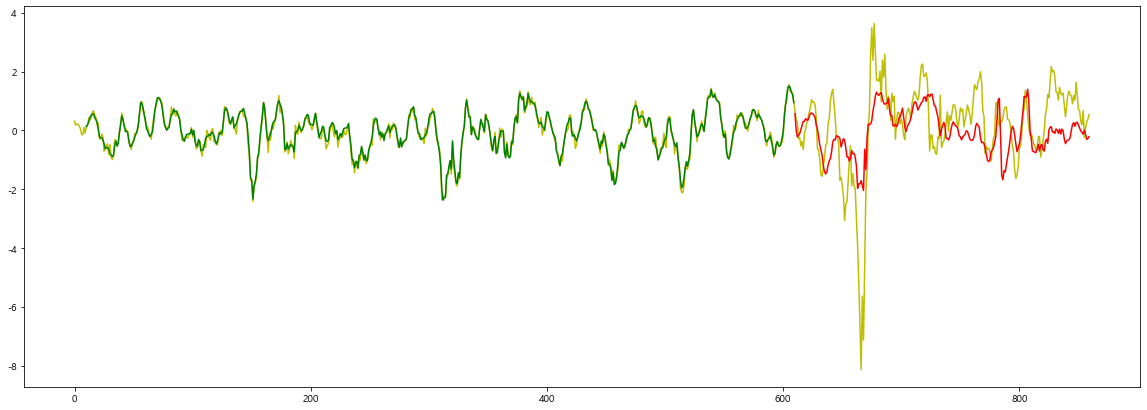

In [554]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.models import Sequential
import tensorflow as tf
activation = tf.nn.leaky_relu

model = Sequential()
model.add(LSTM(128, input_shape=(10,7),activation=activation))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.fit(X_train,Y_train, epochs=100, batch_size=40)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

plt.figure(figsize=(20,7))
plt.plot(Y_values, color='y')

split_pt = train_test_split + window_size
plt.plot(np.arange(window_size, split_pt, 1), train_predict, color='g' )

plt.plot(np.arange(split_pt, split_pt+len(test_predict),1), test_predict, color ='r')

In [555]:
# 예측 성능 출력하는 함수 만들기
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import numpy as np
def confirm_result(y_test, y_pred):
    MAE= mean_absolute_error(y_test, y_pred)
    RMSE= np.sqrt(mean_squared_error(y_test, y_pred))
  # MSLE= mean_squared_log_error(y_test, y_pred)
  # RMSLE= np.sqrt(mean_squared_log_error(y_test, y_pred))
    R2= r2_score(y_test, y_pred)

    pd.options.display.float_format='{:.5f}'.format 
    Result=pd.DataFrame(data=[MAE, RMSE, R2], index=['MAE', 'RMSE', 'R2'], columns=['Results'])
    return Result

confirm_result(Y_test, test_predict)

Results
MAE   0.91275
RMSE  1.24273
R2    0.32202

Epoch 1/100
20/20 [==============================] - 1s 14ms/step - loss: 0.0144 - val_loss: 1.6433
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0146 - val_loss: 1.6393
Epoch 3/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0141 - val_loss: 1.6890
Epoch 4/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0140 - val_loss: 1.6215
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0191 - val_loss: 1.6453
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0159 - val_loss: 1.5878
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0154 - val_loss: 1.6769
Epoch 8/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0147 - val_loss: 1.7418
Epoch 9/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0132 - val_loss: 1.6710
Epoch 10/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0129 - val_loss: 1.7179
Epoch 11

Epoch 83/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0053 - val_loss: 1.6355
Epoch 84/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0049 - val_loss: 1.6456
Epoch 85/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 1.6485
Epoch 86/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0033 - val_loss: 1.6602
Epoch 87/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0036 - val_loss: 1.6281
Epoch 88/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0037 - val_loss: 1.6403
Epoch 89/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0036 - val_loss: 1.6389
Epoch 90/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0035 - val_loss: 1.6658
Epoch 91/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 1.6856
Epoch 92/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0038 - val_loss: 1.6585


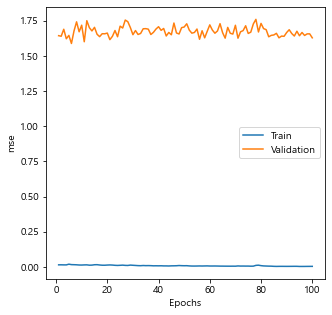

In [528]:
# 모델 만들기
history = model.fit(X_train,Y_train, epochs=100, batch_size=30, validation_data=(X_test, Y_test))

# 손실 함수 그래프

import matplotlib.pyplot as plt
def plot_loss_curve(history, total_epoch=10, start=1):
        
    plt.figure(figsize=(5,5))
    plt.plot(range(start, total_epoch+1), history.history['loss'][start-1:total_epoch], label='Train')
    plt.plot(range(start, total_epoch+1), history.history['val_loss'][start-1:total_epoch], label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mse')
    plt.legend()
    plt.show()

plot_loss_curve(history=history, total_epoch=len(history.history['loss']), start=1)

# 감성 + 기술ver.

In [564]:
# 감성 + 기술
X_values=scaled_total_df[['Close','Open','High','Low','Volume','KOSPI5일_mvg',
                          '감성어점수','감성어5일_mvg','감성어10일이동평균','감성어20일_Change',
                          '감성어30일_Change','감성어60일_Change','감성어120일_Change']]
X_values[:10]

Close    Open    High     Low   Volume  KOSPI5일_mvg    감성어점수  \
Date                                                                        
2017-06-29 0.71141 0.71223 0.69288 0.75932 -0.36170      0.67792 -0.23199   
2017-06-30 0.69282 0.64180 0.63959 0.70127 -0.72113      0.69871 -0.58887   
2017-07-03 0.70574 0.71631 0.67881 0.71630 -0.83625      0.70252 -0.10520   
2017-07-04 0.63868 0.70468 0.66970 0.67747 -0.47968      0.70560 -0.37756   
2017-07-05 0.67629 0.61711 0.63221 0.67375 -0.75584      0.70312 -0.96923   
2017-07-06 0.67370 0.68100 0.64293 0.69851 -0.86993      0.69421 -0.41982   
2017-07-07 0.63556 0.61366 0.60666 0.66040 -0.82429      0.68936 -1.23689   
2017-07-10 0.64627 0.66174 0.63018 0.68525 -0.88836      0.67156 -0.60296   
2017-07-11 0.71304 0.66232 0.66213 0.70743 -0.93010      0.67349 -0.28834   
2017-07-12 0.69272 0.70550 0.67581 0.74444 -0.98504      0.68281 -0.57009   

            감성어5일_mvg  감성어10일이동평균  감성어20일_Change  감성어30일_Change  \
Date                                                              
2017-06-29   -0.58114    -0.69840       -0.20092       -0.74962   
2017-06-30   -0.45984    -0.63965       -0.25742        0.51745   
2017-07-03   -0.66098    -0.77463       -0.40585        0.11133   
2017-07-04   -0.58881    -0.74287       -0.36034       -0.03580   
2017-07-05   -0.42453    -0.63488        0.00778       -0.61938   
2017-07-06   -0.66558    -0.68332       -0.46244       -0.73510   
2017-07-07   -0.61031    -0.65235       -0.42014       -0.25569   
2017-07-10   -0.98034    -0.86593       -0.57368       -1.01607   
2017-07-11   -1.05404    -0.91278       -0.20397       -0.64840   
2017-07-12   -0.83141    -0.81274       -0.41671        0.14990   

            감성어60일_Change  감성어120일_Change  
Date                                       
2017-06-29       -0.40118        -0.08711  
2017-06-30       -0.10344        -0.04522  
2017-07-03       -0.71838        -0.53794  
2017-07-04        0.10328         0.16524  
2017-07-05        0.03275        -0.05698  
2017-07-06       -0.17499        -0.60502  
2017-07-07        0.09632         0.20419  
2017-07-10       -0.35507        -0.67610  
2017-07-11        0.25603        -0.25848  
2017-07-12        0.18466         0.49510

In [565]:
window_size=10
x_values_sets = []
y_values_sets = []

for i in range(len(X_values)-window_size):
    x_values_sets.append(X_values.iloc[i:i+10, :].values.tolist())
    try:
        y_values_sets.append(Y_values[i+10])
    except:
        pass

X=np.asarray(x_values_sets)
Y=np.asarray(y_values_sets)

train_test_split=600

X_train = X[:train_test_split, :]
Y_train = Y[:train_test_split]

X_test = X[train_test_split:, :]
Y_test = Y[train_test_split:]

Epoch 1/100
15/15 [==============================] - 1s 5ms/step - loss: 0.3070
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.2305
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1923
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1664
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1501
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1451
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1418
Epoch 8/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1255
Epoch 9/100
15/15 [==============================] - 0s 5ms/step - loss: 0.1140
Epoch 10/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0967
Epoch 11/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0947
Epoch 12/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0988
Epoch 13/100
15/15 [=================

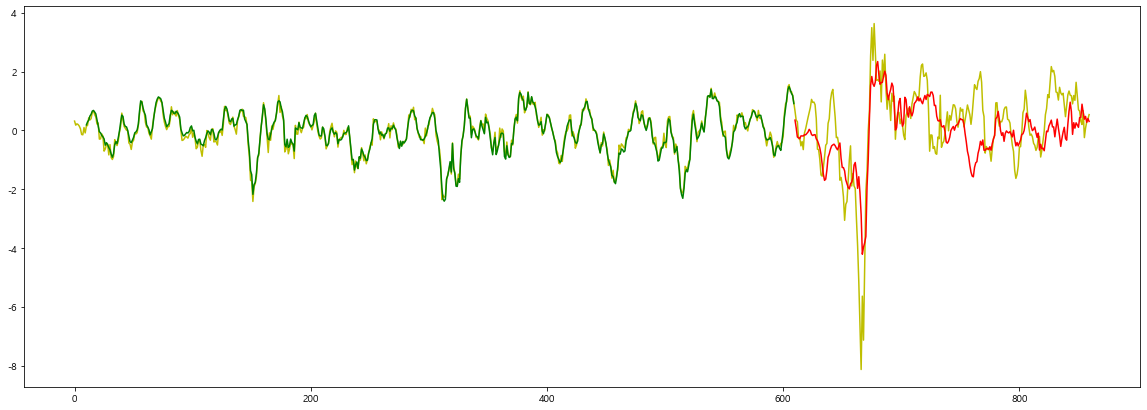

In [567]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.models import Sequential
import tensorflow as tf
activation = tf.nn.leaky_relu

model = Sequential()
model.add(LSTM(128, input_shape=(10,13),activation=activation))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.fit(X_train,Y_train, epochs=100, batch_size=40)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

plt.figure(figsize=(20,7))
plt.plot(Y_values, color='y')

split_pt = train_test_split + window_size
plt.plot(np.arange(window_size, split_pt, 1), train_predict, color='g' )

plt.plot(np.arange(split_pt, split_pt+len(test_predict),1), test_predict, color ='r')

In [568]:
# 예측 성능 출력하는 함수 만들기
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score
import numpy as np
def confirm_result(y_test, y_pred):
    MAE= mean_absolute_error(y_test, y_pred)
    RMSE= np.sqrt(mean_squared_error(y_test, y_pred))
  # MSLE= mean_squared_log_error(y_test, y_pred)
  # RMSLE= np.sqrt(mean_squared_log_error(y_test, y_pred))
    R2= r2_score(y_test, y_pred)

    pd.options.display.float_format='{:.5f}'.format 
    Result=pd.DataFrame(data=[MAE, RMSE, R2], index=['MAE', 'RMSE', 'R2'], columns=['Results'])
    return Result

confirm_result(Y_test, test_predict)

Results
MAE   0.80367
RMSE  1.09175
R2    0.47675

Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 0.0119 - val_loss: 0.4808
Epoch 2/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0120 - val_loss: 0.4782
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0118 - val_loss: 0.4816
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0115 - val_loss: 0.4978
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0110 - val_loss: 0.4600
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.4842
Epoch 7/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0098 - val_loss: 0.4479
Epoch 8/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0100 - val_loss: 0.4816
Epoch 9/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0097 - val_loss: 0.4355
Epoch 10/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0099 - val_loss: 0.4294
Epoch 11

20/20 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.4162
Epoch 84/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.3977
Epoch 85/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.4169
Epoch 86/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.4261
Epoch 87/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0014 - val_loss: 0.4066
Epoch 88/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0012 - val_loss: 0.4079
Epoch 89/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0015 - val_loss: 0.4064
Epoch 90/100
20/20 [==============================] - 0s 6ms/step - loss: 0.0016 - val_loss: 0.3933
Epoch 91/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0015 - val_loss: 0.4041
Epoch 92/100
20/20 [==============================] - 0s 7ms/step - loss: 0.0013 - val_loss: 0.4126
Epoch 93/100


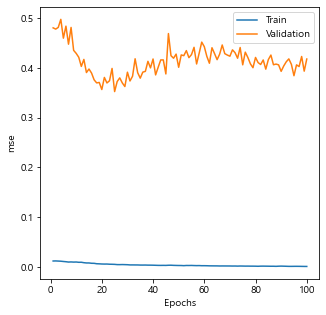

In [492]:
# 모델 만들기
history = model.fit(X_train,Y_train, epochs=100, batch_size=30, validation_data=(X_test, Y_test))

# 손실 함수 그래프

import matplotlib.pyplot as plt
def plot_loss_curve(history, total_epoch=10, start=1):
        
    plt.figure(figsize=(5,5))
    plt.plot(range(start, total_epoch+1), history.history['loss'][start-1:total_epoch], label='Train')
    plt.plot(range(start, total_epoch+1), history.history['val_loss'][start-1:total_epoch], label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('mse')
    plt.legend()
    plt.show()

plot_loss_curve(history=history, total_epoch=len(history.history['loss']), start=1)